In [33]:
from PIL import Image
import numpy as np
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2
import random
from math import log
from google.colab.patches import cv2_imshow
from tqdm import tqdm
import time

In [34]:
def ArnoldCatTransform(img, num):
    rows, cols, ch = img.shape
    n = rows
    img_arnold = np.zeros([rows, cols, ch])
    for x in range(0, rows):
        for y in range(0, cols):
            img_arnold[x][y] = img[(x+y)%n][(x+2*y)%n]
    return img_arnold

def ArnoldCatEncryption(imageName, key):
    img = cv2.imread(imageName)
    for i in range (0,key):
        img = ArnoldCatTransform(img, i)
    cv2.imwrite(imageName.split('.')[0] + "_ArnoldcatEnc.png", img)
    cv2_imshow(img)
    return img

def ArnoldCatDecryption(imageName, key):
    img = cv2.imread(imageName)
    rows, cols, ch = img.shape
    dimension = rows
    decrypt_it = dimension
    if (dimension%2==0) and 5**int(round(log(dimension/2,5))) == int(dimension/2):
        decrypt_it = 3*dimension
    elif 5**int(round(log(dimension,5))) == int(dimension):
        decrypt_it = 2*dimension
    elif (dimension%6==0) and  5**int(round(log(dimension/6,5))) == int(dimension/6):
        decrypt_it = 2*dimension
    else:
        decrypt_it = int(12*dimension/7)
    for i in range(key,decrypt_it):
        img = ArnoldCatTransform(img, i)
    cv2.imwrite(imageName.split('_')[0] + "_ArnoldcatDec.png",img)
    return img

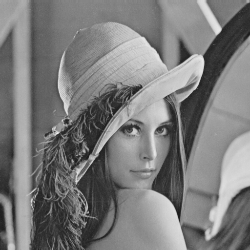

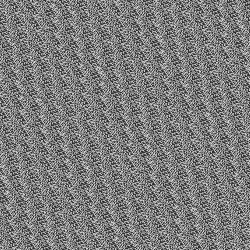

1.397280216217041
53.60728120803833


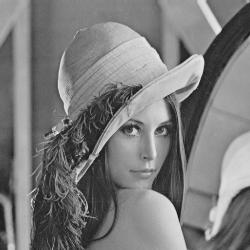

In [35]:
image = "redlena"
ext = ".png"
key = 20
img = cv2.imread(image + ext)
img = cv2.resize(img, (250,250))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
name = "grayscale" + image + ext
cv2.imwrite(name, img)
cv2_imshow(img)

start = time.time()
ArnoldCatEncryptionIm = ArnoldCatEncryption(name, key)
end = time.time()
print(end - start)

start = time.time()
ArnoldCatDecryptionIm = ArnoldCatDecryption("grayscale" + image + "_ArnoldcatEnc.png", key)
end = time.time()
print(end - start)

cv2_imshow(ArnoldCatDecryptionIm)

Text(0.5, 1.0, 'Decrypted Image (key = 20)')

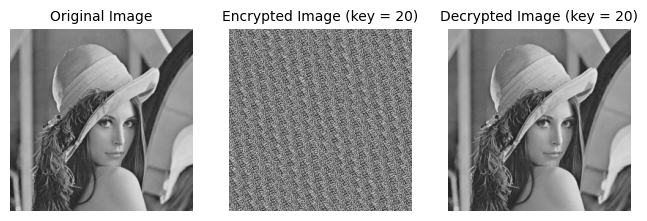

In [52]:
image1 = cv2.imread("grayscaleredlena.png")
image2 = cv2.imread("grayscaleredlena_ArnoldcatEnc.png")
image3 = cv2.imread("grayscaleredlena_ArnoldcatDec.png")

cv2.imwrite("encryptedcopy.png", image2)
ArnoldCatDecryptionIm = ArnoldCatDecryption("encryptedcopy.png", 10)
image4 = ArnoldCatDecryptionIm.copy()

rows = 1
columns = 3

fig = plt.figure(figsize=(8, 8))
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(image1)
plt.axis('off')
plt.title("Original Image", fontsize = 10)

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(image2)
plt.axis('off')
plt.title("Encrypted Image (key = 20)", fontsize = 10)

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)

# showing image
plt.imshow(image3)
plt.axis('off')
plt.title("Decrypted Image (key = 20)", fontsize = 10)

# # Adds a subplot at the 4th position
# fig.add_subplot(rows, columns, 4)

# # showing image
# plt.imshow(image4)
# plt.axis('off')
# plt.title("Decrypted with wrong key (key = 10)", fontsize = 10)

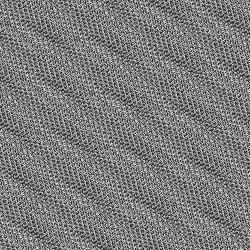

In [55]:
cv2_imshow(image4)